# Richardson_extrapolation_code

Performs the calculations as required for the blog post

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.size']=16
from scipy.optimize import curve_fit
from Richardson_extrapolation import *

## Create analytic and numerical solutions for various numbers of grid points

The Poisson equation is being solved over the domain (0,0) to (Lx,Ly). We are using the method of manufactured solutions, starting with a solution:

\begin{equation}
u_a = sin(\pi x/Lx)sin(2\pi y/Ly)
\end{equation}

The method 'manufacture_source_term' symbolically differentiates the solution to find the analytic source term which we can use to numerically solve the Poisson equation. 

In [2]:
n_list = [[11,11],[21,21],[41,41],[81,81]]
L2_list = []
dx_list = []
u_list = []
ua_list = []
Lx,Ly = 1,1

for nx,ny in n_list:    
    dx_list.append(Lx/(nx-1))
    
    # Create the source term for a given number of grid points
    Q_in_flat,u_a = manufacture_source_term(nx,ny,Lx,Ly)

    # Append the analytic solution to a list
    ua_list.append(u_a)
    
    # Numerically solve and add the resulting solution to a list
    As = create_poisson_matrix(nx,ny,Lx,Ly)
    u = solve_poisson(nx,ny,As,Q_in_flat)
    u_list.append(u)
    
    #Determine L2 norm between the analytic and numerical solution and add to a list
    L2_list.append(L2_norm(u,u_a))

## Visually compare simulated and analytic solutions

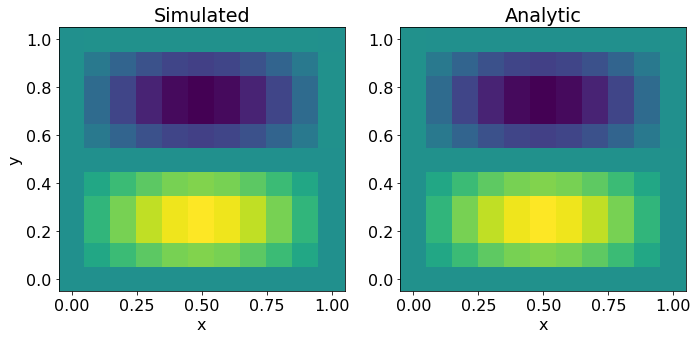

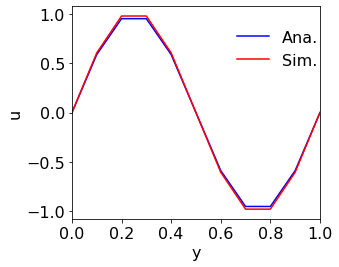

In [23]:
x_vals = np.linspace(0,1,11)
y_vals = np.linspace(0,1,11)

fig,ax = plt.subplots(1,2,figsize=[10,5])
ax[0].pcolor(x_vals,y_vals,u_list[0].T,shading ='auto')
ax[1].pcolor(x_vals,y_vals,ua_list[0].T,shading ='auto')
ax[0].set_ylabel('y')
ax[0].set_xlabel('x')
ax[1].set_xlabel('x')
ax[0].set_title('Simulated')
ax[1].set_title('Analytic')
fig.tight_layout()

fig.savefig('sim_ana.png',facecolor='white',dpi=150)


fig,ax = plt.subplots(1,1,figsize=[5,4])
ax.plot(y_vals,ua_list[0][n_list[0][1]//2,:],color = 'b',label = 'Ana.')
ax.plot(y_vals,u_list[0][n_list[0][1]//2,:],color = 'r',label = 'Sim.')
ax.set_ylabel('u')
ax.set_xlabel('y')
ax.set_xlim([0,1])
fig.legend(frameon=False,loc = [0.68,0.72])
fig.tight_layout()
fig.savefig('sim_ana_x_0pt5.png',facecolor='white',dpi=150)

## Plot the L2 norm between the analytic and numerical solutions as a function of dx,dy

The gradient on a log-log plot is 2.007


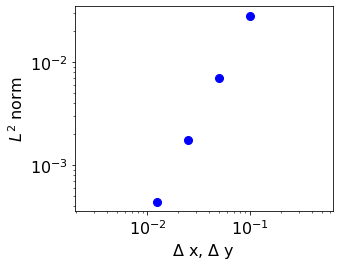

In [24]:
fig,ax = plt.subplots(1,1,figsize=[5,4])
ax.loglog(dx_list,L2_list,'.',markersize=16,color='b')

popt,pcov = curve_fit(fit_lin,np.log10(dx_list),np.log10(L2_list),p0=[1,0])
print('The gradient on a log-log plot is {:0.3f}'.format(popt[0]))

ax.axis('equal')
ax.set_ylabel('$L^2$ norm')
ax.set_xlabel('$\Delta$ x, $\Delta$ y')
fig.tight_layout()

fig.savefig('convergence.png',facecolor='white',dpi=150)

## Performing the Richardson extrapolation

In [25]:
u_R_norm = []
u_R_list = []
for i in range(3):
    a = u_list[i][::1,::1]
    b = u_list[i+1][::2,::2]
    u_R = 4/3*b-a/3
    u_R_list.append(u_R)
    u_R_norm.append(L2_norm(u_R,ua_list[i]))    

The gradient on a log-log plot is 4.009


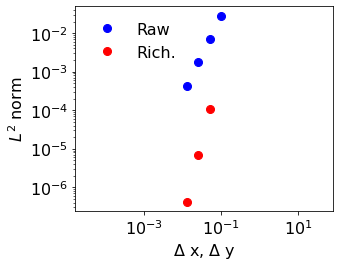

In [26]:
fig,ax = plt.subplots(1,1,figsize=[5,4])
ax.loglog(dx_list,L2_list,'.',markersize=16,color='b',label ='Raw')
ax.loglog(dx_list[1:],u_R_norm,'.',markersize=16, color='r',label = 'Rich.')

popt,pcov = curve_fit(fit_lin,np.log10(dx_list[1:]),np.log10(u_R_norm),p0=[1,0])
print('The gradient on a log-log plot is {:0.3f}'.format(popt[0]))

ax.axis('equal')
ax.set_ylabel('$L^2$ norm')
ax.set_xlabel('$\Delta$ x, $\Delta$ y')
fig.tight_layout()
fig.legend(frameon=False,loc=[0.25,0.75])
fig.savefig('extra.png',facecolor='white',dpi=150)